In [1]:
# Task 1: Data Cleaning & Preprocessing
# Titanic Dataset

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [3]:
print("First 5 rows of dataset:\n", df.head())
print("\nDataset Info:\n")
print(df.info())
print("\nSummary Statistics:\n", df.describe(include="all"))
print("\nMissing Values:\n", df.isnull().sum())


First 5 rows of dataset:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   

In [4]:
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill Embarked with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
df.drop(columns=['Cabin'], inplace=True)

print("\nMissing Values After Handling:\n", df.isnull().sum())


Missing Values After Handling:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\neeth\AppData\Local\Temp\ipykernel_20888\1884747957.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\neeth\AppData\Local\Temp\ipykernel_20888\1884747957.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [5]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot Encoding for Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

print("\nDataset after encoding:\n", df.head())



Dataset after encoding:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    0  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    1  38.0      1      0   
2                             Heikkinen, Miss. Laina    1  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  35.0      1      0   
4                           Allen, Mr. William Henry    0  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000       False        Tr

In [6]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Age', 'Fare']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("\nScaled numerical features:\n", df[numeric_cols].head())


Scaled numerical features:
         Age      Fare
0 -0.565736 -0.502445
1  0.663861  0.786845
2 -0.258337 -0.488854
3  0.433312  0.420730
4  0.433312 -0.486337


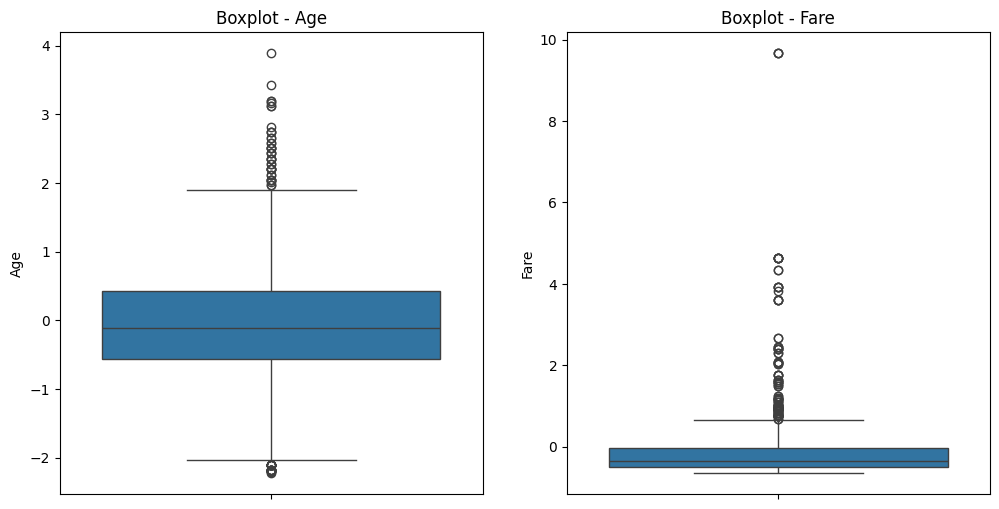

In [7]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(y=df['Age'])
plt.title("Boxplot - Age")

plt.subplot(1,2,2)
sns.boxplot(y=df['Fare'])
plt.title("Boxplot - Fare")
plt.show()

In [8]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

print("\nShape after removing outliers:", df.shape)




Shape after removing outliers: (775, 12)


In [9]:
print("\nFinal Dataset Preview:\n", df.head())

# Save cleaned dataset
df.to_csv("titanic_cleaned.csv", index=False)
print("\n✅ Cleaned dataset saved as 'titanic_cleaned.csv'")


Final Dataset Preview:
    PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0 -0.565736      1      0   
2                        Heikkinen, Miss. Laina    1 -0.258337      0      0   
3  Futrelle, Mrs. Jacques Heath (Lily May Peel)    1  0.433312      1      0   
4                      Allen, Mr. William Henry    0  0.433312      0      0   
5                              Moran, Mr. James    0 -0.104637      0      0   

             Ticket      Fare  Embarked_Q  Embarked_S  
0         A/5 21171 -0.502445       False        True  
2  STON/O2. 3101282 -0.488854       False        True  
3            113803  0.420730       False        True  
4            373450 -0.486337       False        True